In [ ]:
!pip install biopython dendropy ete3 numpy seaborn matplotlib scikit-learn

In [ ]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import _Matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import ParsimonyScorer
from Bio.Phylo.TreeConstruction import ParsimonyTreeConstructor
import matplotlib.pyplot as plt
import tracemalloc
import time
from io import StringIO
import requests

In [ ]:
def rename_sequences(sequences, ids):
    for seq, seq_id in zip(sequences, ids):
        seq.id = seq_id

# # Import sequences
# t1 = SeqIO.read("albanian.fasta", "fasta")
# t2 = SeqIO.read("easterngf.fasta", "fasta")
# t3 = SeqIO.read("marshfrog.fasta", "fasta")
# t4 = SeqIO.read("poolfrog.fasta", "fasta")
# t5 = SeqIO.read("saharafrog.fasta", "fasta")

#Read raw data from Github Repository
albanian_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/albanian.fasta'
easterngf_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/easterngf.fasta'
marshfrog_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/marshfrog.fasta'
poolfrog_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/poolfrog.fasta'
saharafrog_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/saharafrog.fasta'
waterfrog_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/waterfrog.aln'
waterfrog_edited_url = 'https://raw.githubusercontent.com/Gitroars/ComputationalBiology_FinalProject/main/waterfrog_edited.nex'

albanian_fasta_data = requests.get(albanian_url).text
easterngf_fasta_data = requests.get(easterngf_url).text
marshfrog_fasta_data = requests.get(marshfrog_url).text
poolfrog_fasta_data = requests.get(poolfrog_url).text
saharafrog_fasta_data = requests.get(saharafrog_url).text
waterfrog_aln_data = requests.get(waterfrog_url).text
waterfrog_edited_data = requests.get(waterfrog_edited_url).text

# Create file-like objects using StringIO
albanian_file = StringIO(albanian_fasta_data)
easterngf_file = StringIO(easterngf_fasta_data)
marshfrog_file = StringIO(marshfrog_fasta_data)
poolfrog_file = StringIO(poolfrog_fasta_data)
saharafrog_file = StringIO(saharafrog_fasta_data)
waterfrog_aln_file = StringIO(waterfrog_aln_data)
waterfrog_edited_file = StringIO(waterfrog_edited_data)

# Now, you can parse the file-like objects
t1 = SeqIO.parse(albanian_file, 'fasta')
t2 = SeqIO.parse(easterngf_file, 'fasta')
t3 = SeqIO.parse(marshfrog_file, 'fasta')
t4 = SeqIO.parse(poolfrog_file, 'fasta')
t5 = SeqIO.parse(saharafrog_file, 'fasta')

# Collect individual sequences
sequences = []
sequences.extend(t1)
sequences.extend(t2)
sequences.extend(t3)
sequences.extend(t4)
sequences.extend(t5)

# Write all sequences to a new FASTA file
SeqIO.write(sequences, "waterfrogs.fasta", "fasta")

5

In [ ]:
import time
import tracemalloc

tracemalloc.start() #start counting the memory usage

# # Load the water frog sequences into MUSCLE
# # Open the alignment file as a MultipleSeqAlignment object
# with open("waterfrog.aln", "r") as aln:
#     alignment = AlignIO.read(aln, "clustal")

# Create a file-like object using StringIO
alignment_file = StringIO(waterfrog_aln_data)

# Read the alignment from the file-like object
alignment = AlignIO.read(alignment_file, "clustal")

# Calculate Distance Matrix
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

# Measure time and memory usage
start_time = time.time()

# ML Tree Construction using Bio.Phylo
upgma_constructor = DistanceTreeConstructor(calculator, 'upgma')
upgma_tree = upgma_constructor.build_tree(alignment)

# Measure time and memory usage
end_time = time.time()

print(f"Time taken for Original UPGMA tree construction: {end_time - start_time} seconds")
print("Byte and peak: ",tracemalloc.get_traced_memory())

tracemalloc.stop()

# Save ML tree to a new file
Phylo.write(upgma_tree, "upgma_waterfrog_tree.xml", "phyloxml")

Eastern 0.000000
Sahara  0.598580    0.000000
Marsh   0.600946    0.153785    0.000000
Albanian    0.580442    0.167192    0.121451    0.000000
Pool    0.585962    0.164038    0.119874    0.071767    0.000000
    Eastern Sahara  Marsh   Albanian    Pool
Time taken for Original UPGMA tree construction: 0.004087924957275391 seconds
Byte and peak:  (484528, 1327458)


1

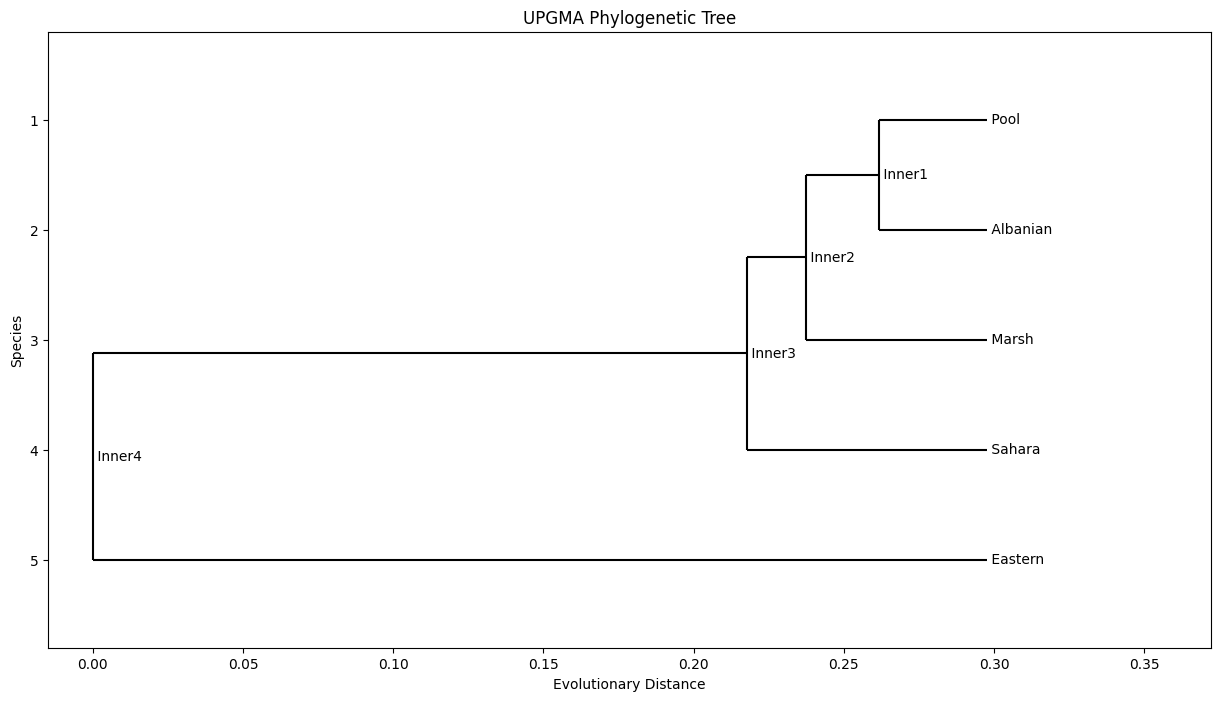

In [ ]:
# Visualize ML tree
fig, ax = plt.subplots(figsize=(15, 8), dpi=100)
Phylo.draw(upgma_tree, axes=ax, do_show=False)

# Add labels and customize layout
ax.set_title("UPGMA Phylogenetic Tree")
ax.set_xlabel("Evolutionary Distance")
ax.set_ylabel("Species")

# Save the figure
fig.savefig("upgma_waterfrog_phylogenetic_tree.png")
plt.show()

In [ ]:
# from scipy.stats import kendalltau

# # RF Distance Calculation
# def robinson_foulds_distance(tree1, tree2):
#     return kendalltau(tree1, tree2)[0]

# # Reference tree
# reference_tree = Phylo.read("nj_waterfrog_tree.xml", "phyloxml")
# OR
# reference_tree = Phylo.read("nj_waterfrog_tree.newick", "newick")

# # Calculate RF distance
# rf_distance = robinson_foulds_distance(reference_tree, ml_tree)
# print(f"Robinson-Foulds Distance: {rf_distance}")


In [ ]:
# Convert the tree to a different format (optional)
Phylo.convert("upgma_waterfrog_tree.xml", "phyloxml", "upgma-waterfrog_tree.nex", "nexus")

1

In [ ]:
import matplotlib
frog_nex = Phylo.read("upgma-waterfrog_edited.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(frog_nex, axes=axes)
fig.savefig("waterfrog2_cladogram")

FileNotFoundError: ignored